# <span style="color:green">CHAPTER 6</span> <u>결정 트리</u>
- 결정트리는분류와 회귀 작업 그리고 다중출력 작업도 가능한 알고리즘
---

설정 코드

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

---
## <span style="color:green">CHAPTER 6.1 결정 트리 학습과 시각화</span>

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [3]:
print("꽃잎 길이와 너비")
print(X)

print()
print("정답")
print(y)

print()
print(len(X), len(y))


꽃잎 길이와 너비
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]


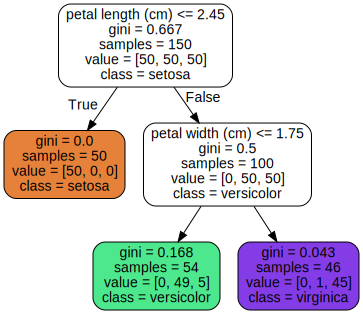

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

그림 저장: decision_tree_decision_boundaries_plot


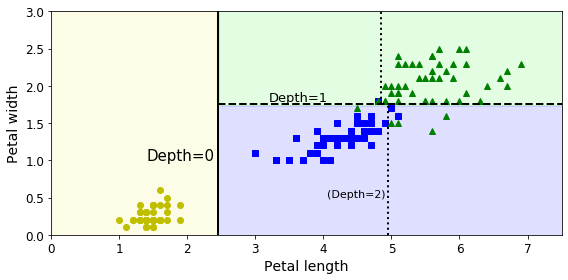

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

---
## <span style="color:green">CHAPTER 6.2 예측하기</span>

- 깊이는 0부터 시작이며 깊이가 0인 노드를 루트 노드라고 칭함
- 자식을 더이상 가지지 않는 노드를 리프 노드라고 칭함


1. 루트 노드에서 꽃잎의 길이가 2.45보다 짧은지 검사(2.45보다 작거나 같다면 깊이 1, 왼쪽노드이며 2.45보다 크다면 깊이 1, 오른쪽 노드) 
   - 깊이 1, 왼쪽 노드인 경우 더 이상 자식을 가지지 않는 리프 노드이므로 추가적인 검사 X


2. 꽃잎의 길이가 2.45보다 긴 깊이 1, 오른쪽 노드에서는 리프 노드가 아니므로 꽃잎의 너비를 기준으로 검사(꽃잎의 너비가 1.75보다 작거나 같다면 깊이 2, 왼쪽 노드이며 1.75보다 크다면 깊이 2, 오른쪽 노드)






- gini : 불순도(얼마나 다른 노드들이 섞여있는지)
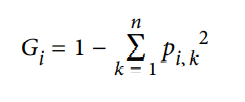
이 식에서 Pi,k는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율을 의미
- samples : 속한 훈련 샘플의 수
- value : 각 클래스 속해있는 훈련 샘플 수
- class : 예측 클래스



---
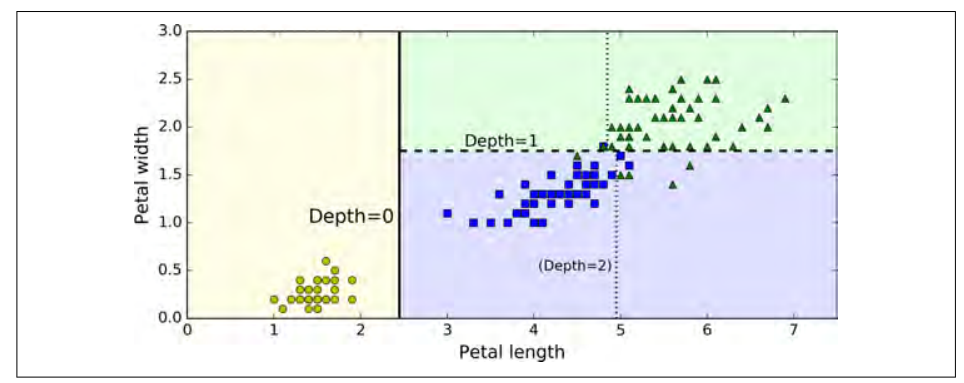

- 깊이 1 부분을 길이(2.45)를 기준으로 나누어 표시
- 깊이 2 부분을 너비(1.75)를 기준으로 나누어 표시


---
## <span style="color:green">CHAPTER 6.3 클래스 확률 추정</span>

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

- 꽃잎의 길이가 5, 너비가 1.5일 경우의 확률
  - 이 부분은 깊이 2, 오른쪽 노드에 해당하는 Case
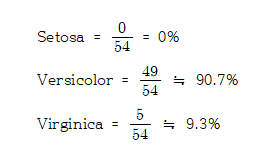

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])


---
## <span style="color:green">CHAPTER 6.4 CART 훈련 알고리즘</span>

- 트리를 훈련시키기 위해 사용되는 알고리즘
- 어떤 특성 k의 임계값 t를 이용해 두 개의 서브셋으로 나누게 되는데 이 t와 k를 고르는데 사용
- CART 알고리즘의 비용 함수
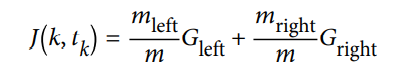
G(left/right)는 왼쪽/오른쪽 서브셋의 불순도, m(left/right)는 왼쪽/오른쪽 서브셋의 샘플 수

- 이 과정을 통해 비용이 최소가 되는 (k,t)를 찾아 적용
- 이를 반복적으로 적용하여 최대 깊이가 되거나 불순도를 줄이는 분할을 찾을 수 없을 때 정지 

---
## <span style="color:green">CHAPTER 6.5 계산 복잡도</span>

- 결정 트리는 균형을 이루고 있다고 가정을 하고 O(log2(m))
- 훈련 알고리즘은 모든 샘플의 모든 특성을 비교하게 되므로 n x m(log(m))

---
## <span style="color:green">CHAPTER 6.6 지니 불순도 또는 엔트로피?</span>

- 기본적으로는 지니 불순도가 사용되지만  criterion 매개변수를 이용해 entropy로 지정한다면 엔트로피 불순도 사용 가능
- 지니 불순도를 사용할 경우 계산이 더 빠르고 기본 값으로 좋지만 한쪽으로 편향되게 될 가능성이 존재 그에 반면 엔트로피를 사용하면 좀 더 균형 잡힌 트리를 만들 수 있음
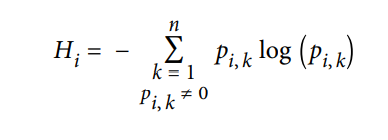
이 식에서 Pi,k는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율을 의미

---
## <span style="color:green">CHAPTER 6.7 규제 매개변수</span>

- criterion(default = “gini”)

  - Decision Tree의 가지를 분리 할 때 어떤 기준으로 정보 획득량을 계산하고 가지를 분리를 할 것인지를 정하는 파라미터이다. “gini”와     “entropy” 총 두 가지가 있으며, 기본 값은 gini이다.

  - “gini”는 “entropy”보다 연산속도는 빠르지만 한쪽으로 편향된 결과를 낼 수 있다.
  - “Entropy”는 “gini”에 비해 조금 더 균형 잡힌 model을 만들 수 있다고 한다.
 

- max_depth(default = None)

  - Decision Tree의 최대 깊이 제한을 줄 수 있는 Parameter이다. 기본 값은 None이며 None일 때는 제한이 없는 상태로 모든 잎이 min_sample_split보다 작거나 불순도가 0일 때까지 노드가 확장된다. max_depth를 활용해 모델을 규제하고 오버피팅을 방지할 수 있다.


- max_leaf_nodes(default = None)

  - 리프 노드의 최대 수에 대한 제한을 줄 수 있는 파라미터이다.


- max_features(default = None)

  - Decision Tree Model을 만들 때 사용할 수 있는 피쳐의 최대 수에 대한 제한을 줄 수 있는 파라미터이다.
  
  

- min_samples_split(default = 2)

  - 노드에서 가지를 분리할 때 필요한 최소 샘플 개수에 대한 제한을 줄 수 있는 파라미터이다.
 

- min_samples_leaf(default = 1)

  - 한 노드에서 가지고 있어야 할 최소 샘플 개수에 대한 제한을 줄 수 있는 파라미터이다. 

- min_impurity_decrease(default = 0.0)
  
  - 최소한의 불순도 감소량을 지정하는 파라미터이다.


- min_impurity_split(default = 0.0)

  - 최소한의 불순도를 지정하는 파라미터이다.
  
- min_weight_fraction_leaf(default = 0.0)

  - min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율을 나태내는 파라미터이다.





---
## <span style="color:green">CHAPTER 6.8 회귀</span>



In [8]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
print(X)
y = 4 * (X - 0.5) ** 2 # y = 4(x - 0.5)^2
y = y + np.random.randn(m, 1) / 10

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]
 [0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]
 [0.61185289]
 [0.13949386]
 [0.29214465]
 [0.36636184]
 [0.45606998]
 [0.78517596]
 [0.19967378]
 [0.51423444]
 [0.59241457]
 [0.04645041]
 [0.60754485]
 [0.17052412]
 [0.06505159]
 [0.94888554]
 [0.96563203]
 [0.80839735]
 [0.30461377]
 [0.09767211]
 [0.68423303]
 [0.44015249]
 [0.12203823]
 [0.49517691]
 [0.03438852]
 [0.9093204 ]
 [0.25877998]
 [0.66252228]
 [0.31171108]
 [0.52006802]
 [0.54671028]
 [0.18485446]
 [0.96958463]
 [0.77513282]
 [0.93949894]
 [0.89482735]
 [0.59789998]
 [0.92187424]
 [0.0884925 ]
 [0.19598286]
 [0.04522729]
 [0.32533033]
 [0.38867729]
 [0.27134903]
 [0.82873751]
 [0.35675333]
 [0.28093451]
 [0.54269608]
 [0.14092422]
 [0.80219698]
 [0.07455064]
 [0.98688694]
 [0.77224477]
 [0.19

그림 저장: tree_regression_plot


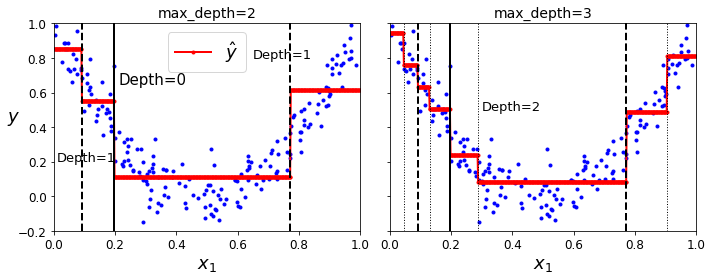

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

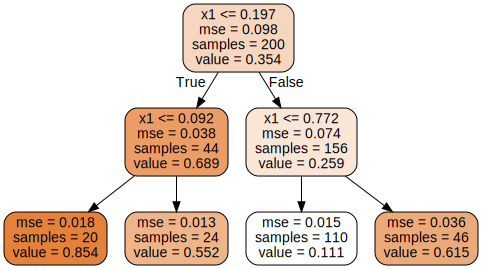

In [11]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

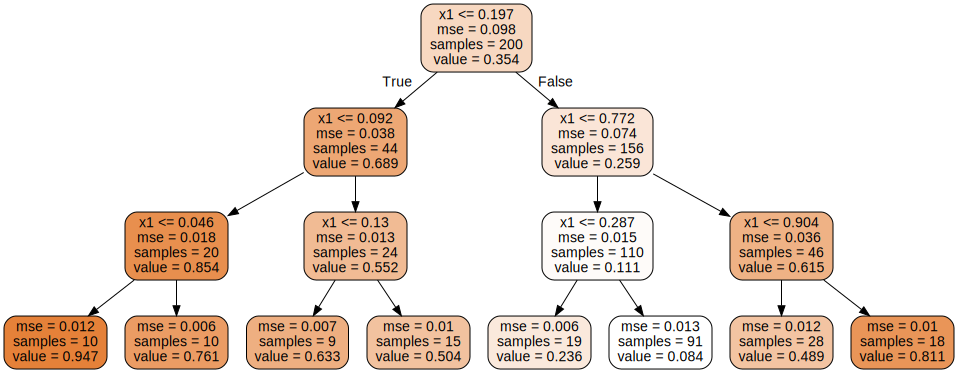

In [12]:
export_graphviz(
        tree_reg2,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

---
- 회귀에서 사용되는 CART 알고리즘은 훈련 세트의 불순도를 최소화하는 방향으로 분할하는 것 대신 평균제곱오차(MSE)를 최소화하도록 분할하는 것
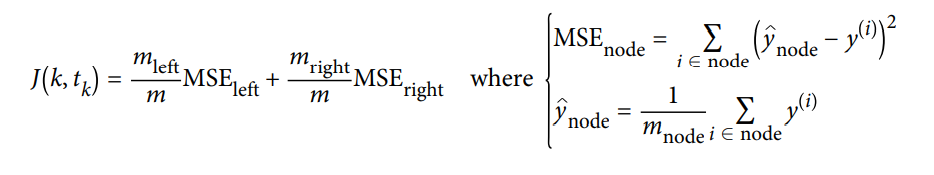

---
- 회귀에서 또한 과대적합이 발생되기 쉽다.

그림 저장: tree_regression_regularization_plot


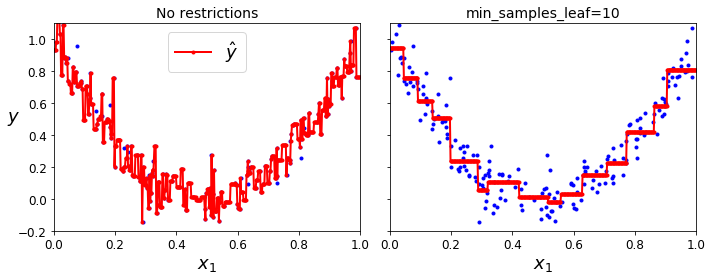

In [13]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

---
## <span style="color:green">CHAPTER 6.9 불안정성</span>
- 결정 트리는 계단 모양의 결정 경계를 만든다.(모든 분할은 축에 수직)
- 훈련 세트의 회전에 민감하다
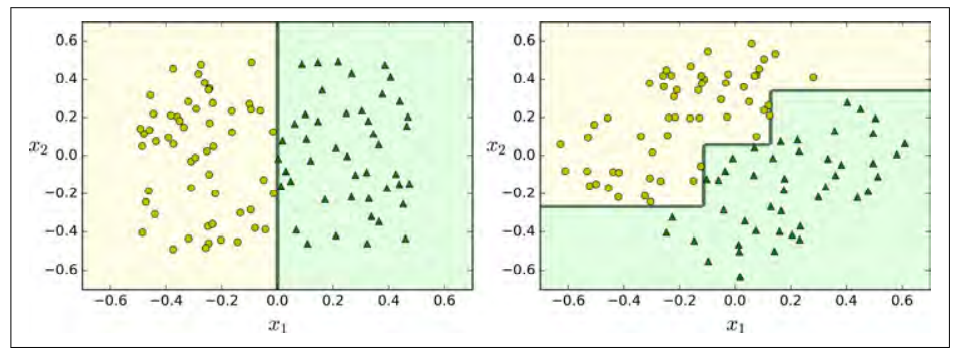

- 결정 트리는 훈련 데이터에 있는 작은 변화에도 매우 민감하다.
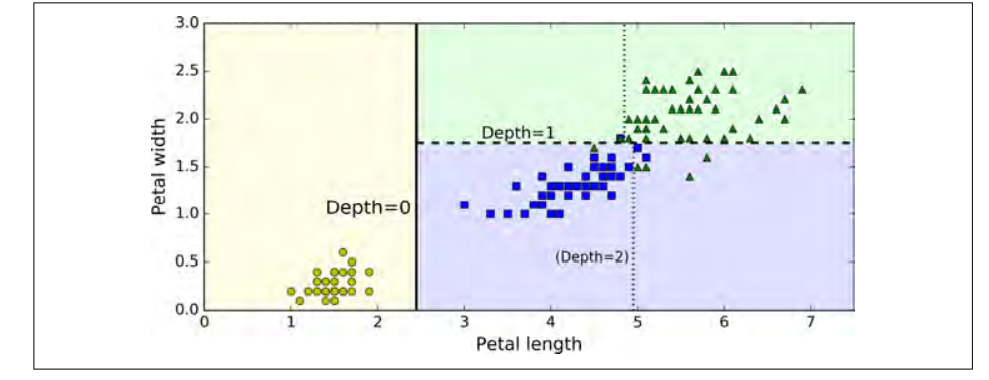

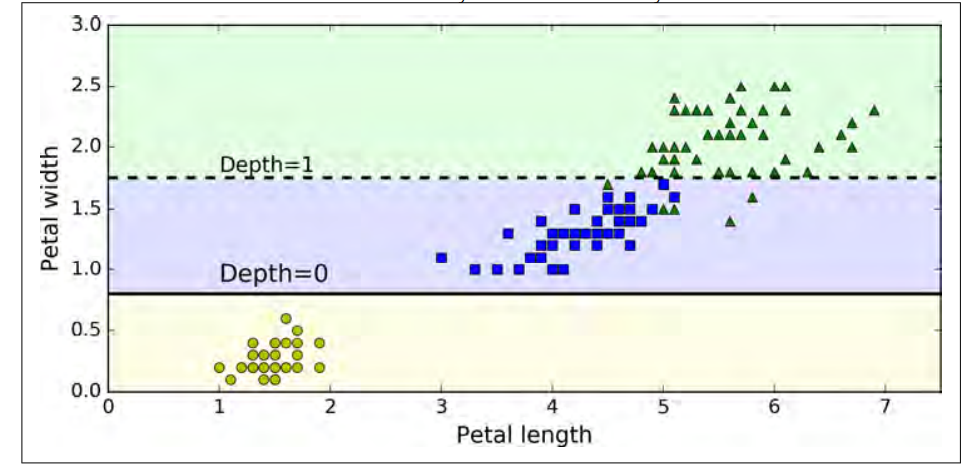

---
## <span style="color:green">CHAPTER 6.10 연습문제</span>
1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?

    - 따라서 깊이는 20이다.

2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요. 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?
   - 일반적으로 작다.

3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?
   - 모델에 규제를 추가해야 과대적합이 감소되므로 줄여야한다.
   
4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까요?
   - 결정 트리는 훈려녀 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않는다. 따라서 할 필요가 없다.
   
   
5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸릴까요?
   - 계산 복잡도 계산식은 O(n x mlog(m)) 인데 현재 샘플 수가 10배 늘었으므로 O(n x 10mlog(m))이라고 할 수 있다. 우리는 백만 개의 샘플을 가진 훈련세트에 걸린 시간을 알고 있으므로 계산 복잡도를 통해 시간이 얼마나 증가할 지 비율을 계산하려고 한다. 따라서 훈련 시간의 증가 비율은 천만개의 샘플을 가질 때의 계산 복잡도 / 백만개의 샘플을 가질 때의 계산 복잡도 이므로 이를 계산하면 약 11.7이 나온다. 1 x11.7 = 11.7이므로 걸리는 시간은 11.7 시간임을 알 수있다.
   
   
6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높일까요?
   - 수천 개 미만일 때 훈련 세트를 사전에 정렬하면 훈련 속도를높일 수 있으나 100.000개의 샘플을 포함하고 있을 때는 훈련 속도가 매우 느려질 것이다.



7. 다음 단계를 따라 moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보시오.

a) X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)를 사용해 데이터셋을 생성합니다.

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

---
b) 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
c) DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCB를 사용하면 됩니다). 힌트 : 여러 가지 max_leaf_nodes 값을 시도해보세요.

In [41]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]} # 98 * 3 = 294, cv = 3이므로 총 882번
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [44]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [42]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

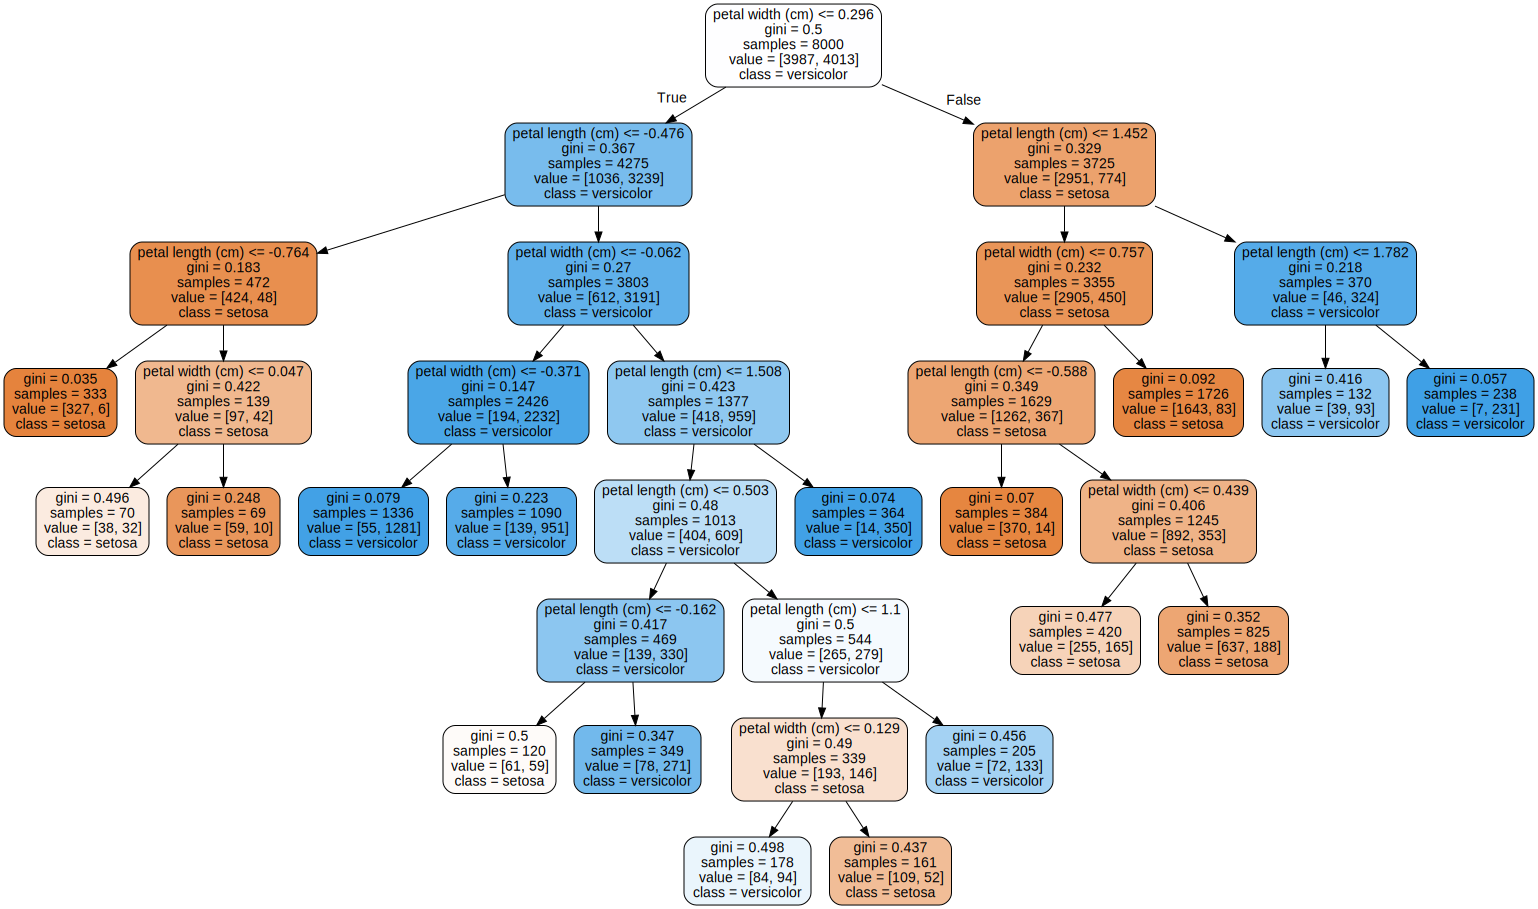

In [45]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        grid_search_cv.best_estimator_,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

---
d) 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85%~ 87%의 정확도가 나올 것입니다.

In [47]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695